<a href="https://colab.research.google.com/github/jaidersoto/Uc/blob/main/Informe_IR_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Informe de la actividad IR CONTROL**
**Microcontroladores**

**Integrantes:**
* Jhon Alexsander Moreno Velasquez 20202005031
* Jaider Alejandro Soto Ovalle     20202005015
* Joshua David Cantillo Latorre 20201005101

**Presentado a:** Gerardo Muñoz

# **Resumen**
La siguiente practica consta de diferenciar los datos que se envian en un programa que utiliza un sensor y control infrarorojo, para identificar diversos comandos de numero que se efectuan.

# **Objetivos**

* Descifrar la representación de cada dígito utilizando los patrones de parpadeo del control remoto específico.
*   Identificar las lecturas recibidas del emisor (control) y procesarlas por medio de un programa que genere numeros hexadecimales.
*   Manejar diversas funciones de listas para la separacion de los datos.
* Realizar la depuracion de la información de manera que se procese correctamente.

# **Desarrollo**

Primeramente ejecutamos el programa que nos brindo el profesor, el siguiente código muestra el tiempo de los intervalos de parpadeo y el tiempo entre dos parpadeos consecutivos. Este codigo se puede encontrar en el siguiente repositorio: [link text](https://github.com/GerardoMunoz/Curso_Python/blob/main/IR_control.ipynb)

In [ ]:
import time
import rp2
from machine import Pin

@rp2.asm_pio(set_init=rp2.PIO.OUT_LOW)
def blink():
    label('inicio')
    mov(x,invert(null))
    jmp(pin,'uno')
    label('cero')
    set(pins, 0)
    jmp(x_dec,'cero_bis')
    jmp('fin')
    label('cero_bis')
    jmp(pin,'fin')
    jmp('cero')
    label('uno')
    set(pins, 1)
    jmp(x_dec,'uno_bis')
    jmp('fin')
    label('uno_bis')
    nop()
    jmp(pin,'uno')
    label('fin')
    mov(isr,x)
    push(noblock)
    jmp('inicio')


sm = rp2.StateMachine(
    0,
    blink,
    freq=38000*100,
    set_base=Pin(0),
    jmp_pin= Pin(17, Pin.IN, Pin.PULL_UP)
)

sm.active(1)
while True:
    dat=sm.get()
    print(2**32-dat,end=', ')

Empezamos por pulsar el botón número **6** del control 10 veces y leer los datos recibidos por el ADC de la raspberry pi pico w, estos datos fueron almacenados en una lista como se muestra acontinuación

In [ ]:
datos=[6520538, 9155, 4241, 629, 510, 603, 479, 632, 479, 628, 482, 629, 483, 627, 482, 628, 481, 628, 482, 629, 1534, 629, 1534, 628, 1532, 627, 1533, 631, 1536, 626, 1534, 629, 1535, 628, 1534, 628, 480, 629, 1534, 627, 480, 630, 1534, 629, 1531, 633, 480, 628, 1534, 628, 483, 628, 1533, 632, 480, 634, 1534, 632, 478, 626, 485, 632, 1534, 628, 482, 626, 1534, 627, 37982, 9079, 2086, 630, 42351682, 9095, 4265, 597, 509, 599, 505, 599, 507, 596, 482, 600, 532, 573, 532, 597, 508, 573, 534, 572, 1586, 574, 1558, 602, 1558, 627, 1533, 603, 1557, 628, 1533, 626, 1535, 603, 1556, 626, 482, 625, 1535, 626, 480, 625, 1537, 623, 1536, 626, 482, 624, 1534, 627, 480, 627, 1534, 625, 509, 600, 1560, 599, 508, 598, 509, 597, 1562, 599, 509, 599, 1560, 599, 4103122, 9008, 4271, 595, 511, 618, 486, 593, 512, 594, 509, 617, 488, 592, 512, 589, 515, 592, 513, 590, 1569, 589, 1569, 591, 1566, 595, 1566, 593, 1564, 620, 1537, 598, 1561, 621, 1537, 599, 509, 596, 1561, 625, 484, 620, 1538, 598, 1560, 623, 484, 625, 1533, 623, 483, 625, 1533, 627, 479, 628, 1529, 623, 483, 622, 484, 621, 1536, 621, 485, 620, 1539, 624, 37985, 9133, 2074, 593, 1623035, 9050, 4239, 622, 482, 595, 509, 623, 480, 597, 508, 593, 511, 596, 509, 625, 479, 598, 506, 597, 1562, 619, 1538, 596, 1561, 621, 1537, 623, 1536, 596, 1561, 626, 1531, 624, 1534, 621, 484, 622, 1534, 623, 483, 619, 1537, 624, 1534, 599, 504, 621, 1537, 596, 507, 624, 1535, 624, 480, 622, 1535, 622, 483, 623, 481, 620, 1536, 624, 480, 621, 1536, 620, 37994, 9053, 2102, 591, 1205008, 9025, 4272, 592, 516, 590, 515, 594, 510, 590, 515, 615, 488, 602, 502, 591, 515, 592, 512, 591, 1566, 592, 1567, 592, 1566, 594, 1562, 594, 1565, 593, 1567, 594, 1563, 591, 1568, 590, 514, 593, 1566, 591, 514, 588, 1571, 591, 1566, 591, 514, 589, 1569, 590, 517, 588, 1569, 592, 513, 591, 1566, 594, 512, 617, 488, 590, 1568, 589, 517, 588, 1568, 592, 38021, 9019, 2118, 590, 1229860, 9013, 4272, 619, 486, 594, 510, 596, 509, 593, 511, 611, 493, 590, 514, 594, 511, 620, 484, 617, 1539, 596, 1562, 594, 1564, 594, 1564, 620, 1538, 620, 1538, 623, 1533, 627, 1531, 624, 482, 595, 1563, 617, 488, 618, 1539, 623, 1535, 620, 484, 619, 1539, 596, 508, 619, 1539, 622, 482, 621, 1536, 625, 479, 623, 482, 623, 1533, 625, 480, 597, 1561, 625, 37988, 9049, 2081, 626, 1190013, 9000, 4269, 620, 485, 619, 484, 623, 481, 618, 483, 624, 481, 598, 505, 618, 485, 620, 484, 620, 1537, 598, 1559, 594, 1563, 597, 1560, 623, 1535, 624, 1534, 620, 1536, 598, 1558, 623, 483, 598, 1559, 600, 503, 622, 1535, 620, 1537, 623, 481, 622, 1536, 596, 507, 625, 1531, 619, 486, 596, 1560, 624, 479, 621, 482, 598, 1561, 619, 483, 622, 1534, 624, 37993, 9020, 2087, 626, 1440681, 9024, 4275, 620, 485, 621, 485, 619, 486, 622, 482, 625, 480, 621, 484, 595, 509, 622, 484, 595, 1563, 595, 1563, 620, 1539, 624, 1534, 595, 1564, 606, 1552, 598, 1562, 624, 1535, 621, 483, 624, 1535, 623, 484, 595, 1563, 596, 1563, 592, 514, 595, 1564, 597, 508, 619, 1540, 592, 515, 592, 1564, 599, 508, 617, 487, 595, 1564, 623, 482, 621, 1536, 623, 37990, 9050, 2110, 601, 1190666, 9018, 4276, 596, 507, 595, 509, 597, 508, 590, 515, 595, 508, 619, 486, 592, 513, 593, 510, 594, 1564, 591, 1567, 595, 1563, 595, 1563, 592, 1566, 594, 1563, 620, 1538, 592, 1566, 621, 483, 619, 1539, 594, 511, 593, 1564, 596, 1561, 620, 485, 590, 1566, 594, 512, 615, 1543, 593, 511, 595, 1561, 592, 512, 594, 512, 592, 1565, 614, 490, 590, 1567, 593, 38019, 9045, 2088, 595, 1288015, 9007, 4273, 623, 480, 591, 514, 595, 509, 622, 484, 589, 514, 593, 508, 618, 487, 593, 511, 597, 1559, 595, 1562, 595, 1564, 598, 1559, 597, 1559, 597, 1562, 598, 1560, 596, 1559, 596, 510, 618, 1538, 597, 507, 625, 1533, 621, 1536, 595, 510, 595, 1564, 594, 508, 597, 1559, 593, 513, 619, 1537, 594, 511, 590, 513, 589, 1569, 591, 513, 596, 1561, 618, 37995, 9011, 2115, 591]

Sin embargo, debíamos separar las lecturas de cada pulsación, dado que los datos obtenidos corresponden a un tiempo (alto ó bajo), se evidencia que al momento anterior de realizar cada pulsación del botón, se hace la lectura de un dato que es mucho mayor a los demás, por lo que podemos concluir que este es el tiempo entre lecturas; sabiendo esto, podemos usar este dato para filtrar y separar los datos de cada pulsación en sublistas que estarán contenidas en una lista general, para ello se plantea la siguiente función

In [ ]:
def separar(datos):
    listal=[]
    listan=[]
    for dato in datos:
            #Valida que la lista de listas (listal) no esté vacía ,si lo está pasa al siguiente elemento
            if dato > 10000:
                if listan==[]:
                    pass
                else:
                    listal.append(listan)
                    listan=[]
            else:
                listan.append(dato)
    return listal[:]


Una vez tenemos los datos filtrados, debemos eliminar aquellas listas cuya longitud sea menor a las demás, con el fin de quedarnos con listas compuestas por igual número de elementos, para ello tomamos como referencia la primera de las listas.

In [ ]:
lista_de_listas=separar(datos[:])
longitud=len(lista_de_listas[0])
lista_filtrada=[lista for lista in lista_de_listas if len(lista) == longitud]

Ahora hallaremos el promedio de el i-nesimo elemento de las sublistas empleando la siguiente función

In [ ]:
def promedio_elementos(lista):

    # Crear una lista para almacenar los promedios
    promedios = []

    # Iterar sobre cada índice de los elementos de las sublistas
    for i in range(len(lista[0])):
        # Extraer el elemento i-ésimo de cada sublista, asegurándose de que la sublista sea lo suficientemente larga
        elementos_i = [sublista[i] for sublista in lista if len(sublista) > i]

        # Calcular el promedio de los elementos i-ésimos si hay elementos para promediar
        if elementos_i:
            promedio_i = sum(elementos_i) / len(elementos_i)
            promedios.append(promedio_i)

    return promedios

promedios=promedio_elementos(lista_filtrada)
print(promedios)

[9039.5, 4265.3, 611.3, 497.1, 602.5, 499.6, 607.1, 498.1, 605.0, 497.1, 609.8, 497.8, 601.1, 503.4, 604.7, 500.3, 603.1, 502.0, 600.2, 1557.9, 597.8, 1557.9, 600.7, 1557.6, 607.2, 1551.1, 607.1, 1552.0, 610.4, 1548.1, 613.2, 1545.4, 610.4, 1547.8, 614.9, 491.0, 611.9, 1546.4, 612.3, 493.4, 613.5, 1545.1, 612.1, 1545.9, 612.2, 493.8, 610.8, 1547.6, 604.1, 501.3, 616.7, 1541.6, 611.9, 496.8, 609.8, 1548.2, 610.4, 495.3, 613.1, 492.3, 605.7, 1552.8, 613.3, 492.1, 608.0, 1549.6, 614.5]


A continuación gráficamos estos promedios para tener una idea de su comportamieno.

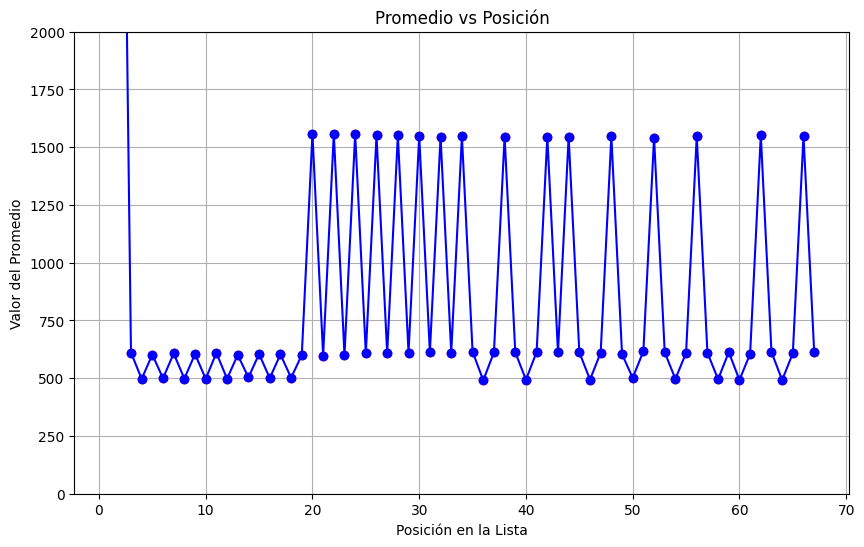

In [ ]:
import matplotlib.pyplot as plt

x = list(range(1, len(promedios) + 1))

# Crear la gráfica
plt.figure(figsize=(10, 6)) # Opcional: Define el tamaño de la figura

plt.plot(x, promedios, marker='o', linestyle='-', color='b') # Gráfica de línea
plt.scatter(x, promedios, color='r') # Opcional: Añade puntos a cada valor de promedio

# Añadir título y etiquetas a los ejes
plt.title('Promedio vs Posición')
plt.xlabel('Posición en la Lista')
plt.ylabel('Valor del Promedio')

plt.ylim(0, 2000)

# Opcional: Añadir cuadrícula para mejor visualización
plt.grid(True)

# Mostrar la gráfica
plt.show()

Hacemos un zoom sobre el eje Y con el fin de visualizar mejor los datos, descartamos los primeros ya que corresponen al tiempo de inicio de cada pulsación.

podemos ver que se forma una especie gráfica que asemeja a una señal triangular, donde los picos se encuentran sobre 1500 y los valles se encuentran por debajo de 750 ,podríamos convertir esta función a una función binaria, representando los picos como un 1 y los valles como un cero de la siguiente manera.

In [ ]:
binario=[('1' if (promedios[i] > 750 and promedios[i] < 7000) else '0')  for i in range(len(promedios)) ]

Si gráficamos esta lista obtendremos lo siguiente.

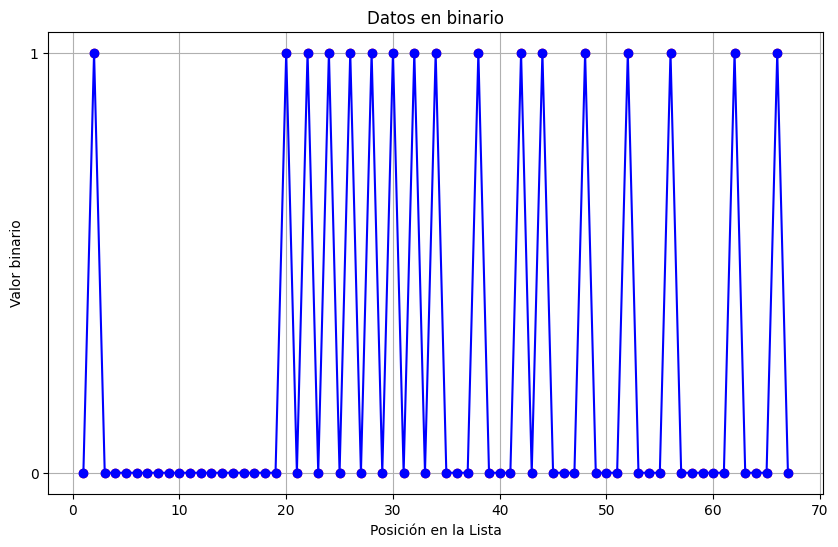

In [ ]:

x = list(range(1, len(binario) + 1))

# Crear la gráfica
plt.figure(figsize=(10, 6)) # Opcional: Define el tamaño de la figura

plt.plot(x, binario, marker='o', linestyle='-', color='b') # Gráfica de línea
plt.scatter(x, binario, color='r') # Opcional: Añade puntos a cada valor de promedio

# Añadir título y etiquetas a los ejes
plt.title('Datos en binario')
plt.xlabel('Posición en la Lista')
plt.ylabel('Valor binario')


# Opcional: Añadir cuadrícula para mejor visualización
plt.grid(True)

# Mostrar la gráfica
plt.show()

Ya que tenemos los valores en binario, los concatenaremos y crearemos un numero exadecimal para cada tupla de 8 bits, generando así 4 números hexadecimales que representarán la pulsación del boton número 6 del control.

In [ ]:
binario=''.join(binario)

binario

cod=[int(binario[i*8 : (i+1)*8],2)  for i in range(4)]

print(cod)

print([hex(val) for val in cod])

# Joshua David Cantillo
# Jaider Soto
# Alexander Moreno


[64, 0, 21, 85]
['0x40', '0x0', '0x15', '0x55']


**['0x40', '0x0', '0x15', '0x55']**  es la tupla que recibe el infrarojo al momento de presionar la tecla número **6**.

# **Conclusiones**



*   El programa demuestra una capacidad para procesar datos provenientes de un control remoto infrarrojo. Utiliza un enfoque de división de datos en paquetes y posterior filtrado para seleccionar los datos relevantes para su procesamiento adicional.
*   La función separar(datos) es central en la organización de los datos entrantes en el programa. Divide los datos en paquetes, lo que sugiere una estructura organizativa para la gestión de los comandos enviados por el control remoto, facilitando su posterior manipulación.
* La conversión de los datos a formato binario y hexadecimal conforma una etapa de codificación de los comandos recibidos. Este paso es crucial para la interpretación precisa de los comandos por parte del dispositivo controlado, ya que proporciona una representación estandarizada y legible de los datos de entrada.

